## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')
# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [14]:
# Checking the number of mice.
mice = combined_df['Mouse ID'].value_counts()
number_mice = (len(mice))
number_mice

249

In [15]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df.loc[combined_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_df = combined_df[combined_df['Mouse ID']!='g989']
clean_combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [17]:
# Checking the number of mice in the clean DataFrame.
number_mice = len(clean_combined_df['Mouse ID'].unique())
number_mice

248

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_mean = clean_combined_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
tumor_median = clean_combined_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
tumor_var = clean_combined_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
tumor_std = clean_combined_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
tumor_sem = clean_combined_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

tumor_df = pd.DataFrame({
                            'Tumor Regimen Mean': tumor_mean,
                            'Tumor Regimen Median': tumor_median,
                            'Tumor Regimen Variance': tumor_var,
                            'Tumor Regimen Std Dev': tumor_std,
                            'Tumor SEM': tumor_sem
})
tumor_df
# This method is the most straighforward, creating multiple series and putting them all together at the end.


,Tumor Regimen Mean,Tumor Regimen Median,Tumor Regimen Variance,Tumor Regimen Std Dev,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
single_group = clean_combined_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
single_group
# This method produces everything in a single groupby function


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

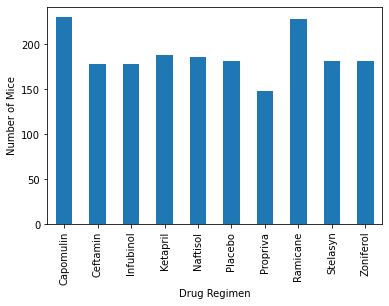

In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
# df.plot.bar



Text(0, 0.5, 'Number of Mice')

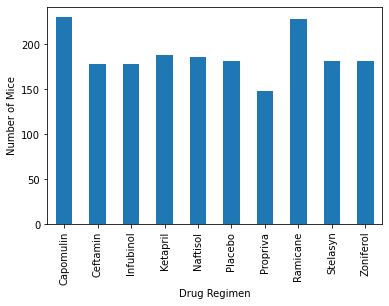

In [63]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
mice_num = clean_combined_df.groupby(['Drug Regimen']).count()['Mouse ID']
mice_num

bar_plot = mice_num.plot.bar()
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

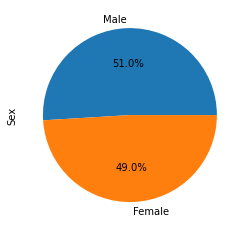

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


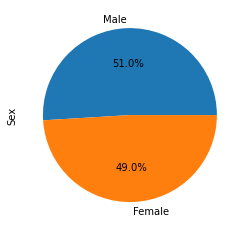

In [62]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_demo = clean_combined_df["Sex"].value_counts()
bar_plot = gender_demo.plot(kind='pie', autopct = '%1.1f%%')

## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

last_timepoint = combined_df.groupby(["Mouse ID", "Drug Regimen"]).agg(Timepoint=("Timepoint", "max"))
# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_timepoint_df = last_timepoint.merge(combined_df, how="inner", on=["Mouse ID", "Drug Regimen","Timepoint"])
last_timepoint_df                                  

,Mouse ID,Drug Regimen,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,45,Female,20,23,67.973419,2
1,a251,Infubinol,45,Female,21,25,65.525743,1
2,a262,Placebo,45,Female,17,29,70.717621,4
3,a275,Ceftamin,45,Female,20,28,62.999356,3
4,a366,Stelasyn,30,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,Propriva,10,Female,12,26,48.710661,0
245,z578,Ramicane,45,Male,11,16,30.638696,0
246,z581,Infubinol,45,Female,24,25,62.754451,3
247,z795,Naftisol,45,Female,13,29,65.741070,3


In [46]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for regimen in treatments:
    tumorvolume = last_timepoint_df["Tumor Volume (mm3)"].loc[last_timepoint_df["Drug Regimen"] == regimen]
    
    # add subset
    tumor_vol_data.append(tumorvolume)

    quartiles = tumorvolume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
                         
    print(f"Treatment: {regimen}")
    print(f"The lower quartile Tumor Volume (mm3), for {regimen} is:{round(lowerq,3)}")
    print(f"The upper quartile Tumor Volume (mm3), for {regimen} is:{round(upperq,3)}")
    print(f"The median Tumor Volume (mm3), for {regimen} is:{round(quartiles[0.5],3)}")
    print(f"The interquartile range is: {round(iqr,3)}")
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
                         
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
                         
    lower_outlier = last_timepoint_df["Drug Regimen"][last_timepoint_df["Tumor Volume (mm3)"] < lower_bound].count()
    upper_outlier = last_timepoint_df["Drug Regimen"][last_timepoint_df["Tumor Volume (mm3)"] > upper_bound].count()  
    outliers = lower_outlier + upper_outlier
    print(f"{outliers} possible outliers were found for {regimen}")

Treatment: Capomulin
The lower quartile Tumor Volume (mm3), for Capomulin is:32.377
The upper quartile Tumor Volume (mm3), for Capomulin is:40.159
The median Tumor Volume (mm3), for Capomulin is:38.125
The interquartile range is: 7.782
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
147 possible outliers were found for Capomulin
Treatment: Ramicane
The lower quartile Tumor Volume (mm3), for Ramicane is:31.56
The upper quartile Tumor Volume (mm3), for Ramicane is:40.659
The median Tumor Volume (mm3), for Ramicane is:36.562
The interquartile range is: 9.099
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
133 possible outliers were found for Ramicane
Treatment: Infubinol
The lower quartile Tumor Volume (mm3), for Infubinol is:54.049
The upper quartile Tumor Volume (mm3), for Infubinol is:65.526
The median Tumor Volume (mm3), for Infubinol is:60.165
The interquartile range is: 11.477
Values below 3

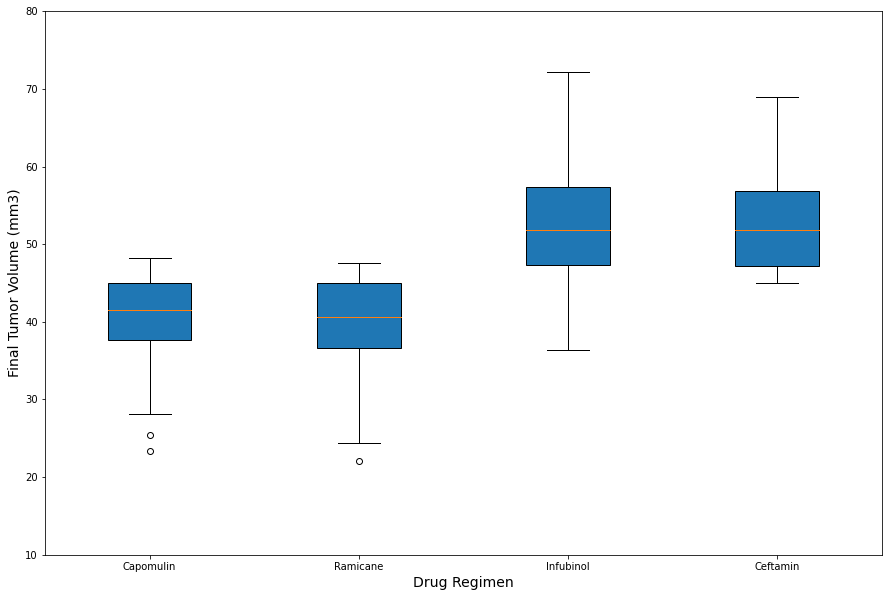

In [13]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
capomulin_regimen = clean_combined_df.loc[clean_combined_df['Drug Regimen'] == 'Capomulin', 'Tumor Volume (mm3)']
ramicane_regimen = clean_combined_df.loc[clean_combined_df['Drug Regimen'] == 'Ramicane', 'Tumor Volume (mm3)']
infubinol_regimen = clean_combined_df.loc[clean_combined_df['Drug Regimen'] == 'Infubinol', 'Tumor Volume (mm3)']
ceftamin_regimen = clean_combined_df.loc[clean_combined_df['Drug Regimen'] == 'Ceftamin', 'Tumor Volume (mm3)']

# Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# fig1, ax1 = plt.subplots()
# ax1.set_ylabel('Final Tumor Volume (mm3)')
# ax1.boxplot([capomulin_regimen, ramicane_regimen, infubinol_regimen, ceftamin_regimen], labels=Regimen)
# plt.show()


data_to_plot = [capomulin_regimen, ramicane_regimen, infubinol_regimen, ceftamin_regimen]
Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 14)
ax1.boxplot(data_to_plot, labels=Regimen, widths = 0.4, patch_artist=True,vert=True)
plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

mouse_df = clean_combined_df.loc[clean_combined_df["Mouse ID"] == "b742",:]
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
290,b742,Capomulin,Male,7,21,0,45.000000,0
291,b742,Capomulin,Male,7,21,5,41.534097,0
292,b742,Capomulin,Male,7,21,10,41.999228,0
293,b742,Capomulin,Male,7,21,15,39.524843,0
294,b742,Capomulin,Male,7,21,20,37.950355,0


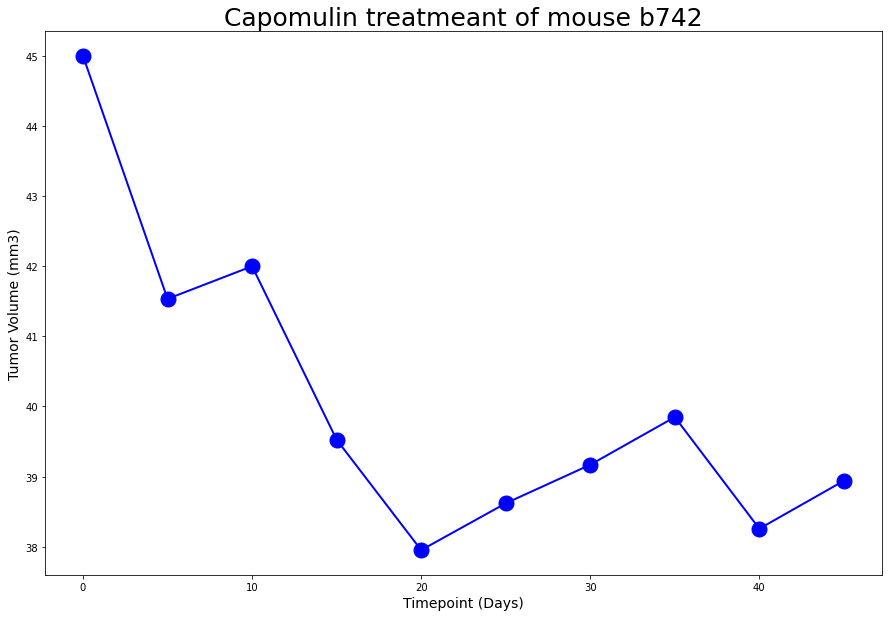

In [17]:
x_axis = mouse_df["Timepoint"]
tumsiz = mouse_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.title('Capomulin treatmeant of mouse b742',fontsize =25)
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,marker="o",color="blue", label="Fahreneit")
plt.xlabel('Timepoint (Days)',fontsize =14)
plt.ylabel('Tumor Volume (mm3)',fontsize =14)
plt.show()

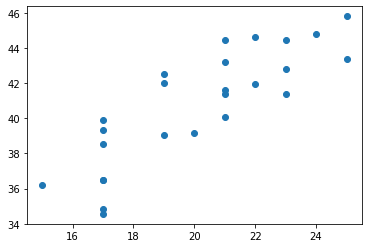

In [31]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_data = clean_combined_df.loc[clean_combined_df['Drug Regimen']=='Capomulin']
avg_tumor_per_mouse = capomulin_data.groupby('Mouse ID').mean()

x_axis = avg_tumor_per_mouse['Weight (g)']
y_axis = avg_tumor_per_mouse['Tumor Volume (mm3)']
plt.scatter(x_axis, y_axis)                  

## Correlation and Regression

In [7]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
from scipy.stats import linregress
# x_axis = clean_combined_df['Weight (g)']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
# plt.annotate(line_eq,(0,50),fontsize=15,color="red")
# plt.xlabel('Weight (g)')
# plt.ylabel('Average Tumor Volume (mm3)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

NameError: name 'x_axis' is not defined